# Plotting V ratio 
working only in parent directory because of imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

from visualization.utils import clean_outliers_and_mask, evenly_spaced_data, get_parameters_from_particle_type
from eos.relativistic_ISCT import Relativistic_ISCT

labels = ['vdw', 'IST', 'ISCT', 'ISCT2']

data_folder = 'cs_sq_fulldata'
# plot_dir = 'visualization/plots/second_batch_with_antibar'
plot_dir = 'visualization/plots/no_b_1_plots_for_ICNFP'

In [2]:
def get_df():
    # reading main data file
    filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
    df = pd.read_csv(os.path.join(data_folder, filepath))

    # checking if exists extra data for same file (with obvious prefix)
    # if yes then concat it to main df
    extradata_filepath = f'cs_sq_extradata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
    extradata_fullpath = os.path.join(data_folder, extradata_filepath)
    if os.path.isfile(extradata_fullpath):
        extra_df = pd.read_csv(extradata_fullpath)
        df = df.append(extra_df)
    return df

def get_plot_folder(folder_label):
    if not selected_only:
        plot_folder = os.path.join(plot_dir, folder_label)
    else:
        plot_folder = os.path.join(plot_dir, selected_plots_dir)
    return plot_folder

def get_savepath():
    return os.path.join(plot_folder, plot_file)

def make_axis_labels():
    # plt.xticks(np.arange(0,3001,300))
    plt.xscale('log')

    plt.xlabel('$T$, MeV')
    plt.ylabel('$v_{eff}^{rel}/4V_1$')

def plotting(main_linestyle, curve_label=None, s=30):
    df = get_df()
    if cleaning: 
        df = clean_outliers_and_mask(df)

    m, R = get_parameters_from_particle_type(particle_type)
    eos = Relativistic_ISCT(m=m, eos=label, g=g, R=R, b=b)

    T_data = df['T'].to_numpy()
    v_data = []
    for i in range(len(df)):
        row = df.iloc[i]
        variables = (0, row['T'], row['p'], row['Sigma'], row['K'])
        v_ratio = eos.v_eff_ratio(*variables)
        v_data.append(v_ratio)

    plt.plot( T_data, v_data, linestyle=main_linestyle)
    plt.scatter(*evenly_spaced_data(T_data, v_data), marker=next(markers), label=curve_label, s=s)


In [3]:
saving = True
cleaning = True

selected_only = True
selected_plots_dir = 'bigger_font'

# baryons

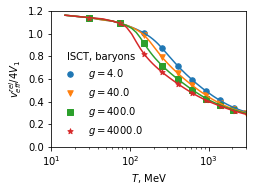

In [4]:
# plots for different g
g_array = [4., 40.,400.,4000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'baryons'
mu = 0.
R = 0.39

selected_eos = ['ISCT', ]

plt.figure(figsize=(3.5,2.5))
for label in labels:

    # plotting only selected eos
    if selected_only:
        if label not in selected_eos:
            continue

    b = 1.
    for g in g_array:
        plotting('-', curve_label=f'$g={g}$')
    
    plt.gca().set_prop_cycle(None)
    
    # b = 0.
    # for g in g_array:
    #     plotting('--')
    
    plt.xlim(10, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{label}, {particle_type}')

    plot_folder = get_plot_folder('diff_g')
    plot_file = f'vratio_of_T_{particle_type}_{label}_R_{R}_mu_{mu}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

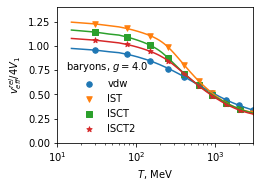

In [5]:
# plots for different eos
g_array = [4., 40.,400.,4000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'baryons'
mu = 0.
R = 0.39

selected_g = [4.]

plt.figure(figsize=(3.5,2.5))

for g in g_array:

    # plotting only selected g values
    if selected_only:
        if g not in selected_g:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)
    
    plt.gca().set_prop_cycle(None)
    
    # b = 0.
    # for label in labels:
    #     plotting('--')
        
    
    plt.xlim(10, 3e3)
    plt.ylim(0, 1.4)
    
    make_axis_labels()

    plt.legend(frameon=False, title=f'{particle_type}, $g={g}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'vratio_of_T_{particle_type}_g_{g}_R_{R}_mu_{mu}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

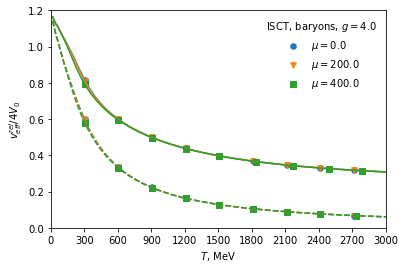

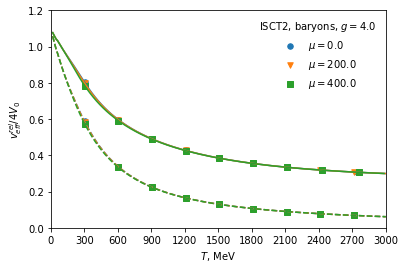

In [6]:
# plots for different mu
g_array = [4., 4000.]

particle_type = 'baryons'
mu_array = [0., 200., 400.]
R = 0.39

markers = cycle(['o', 'v', 's'])

selected_g = [4.]
selected_eos = ['ISCT', 'ISCT2']

plt.figure(figsize=(3.5,2.5))

for g in g_array:
    for label in labels:

        # plotting only selected g and eos
        if selected_only:
            if g not in selected_g or label not in selected_eos:
                continue

        b = 1.
        for mu in mu_array:
            plotting('-', curve_label=f'$\\mu={mu}$' )
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for mu in mu_array:
            plotting('--')
            
        
        plt.xlim(0, 3e3)
        plt.ylim(0, 1.2)

        make_axis_labels()

        plt.legend(frameon=False, title=f'{label}, {particle_type}, $g={g}$')

        plot_folder = get_plot_folder('diff_mu')
        plot_file = f'vratio_of_T_{particle_type}_{label}_g_{g}_R_{R}_.pdf'
        savepath = get_savepath()
        if saving:
            plt.savefig(savepath, bbox_inches='tight')

        plt.show()

# pions

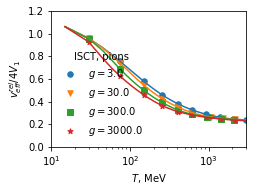

In [6]:
# plots for different g
g_array = [3., 30.,300.,3000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'pions'
mu = 0.
R = 0.39

selected_eos = ['ISCT']

plt.figure(figsize=(3.5,2.5))

for label in labels:

    # plotting only selected eos
    if selected_only:
        if label not in selected_eos:
            continue

    b = 1.
    for g in g_array:
        plotting('-', curve_label=f'$g={g}$')
    
    plt.gca().set_prop_cycle(None)
    
    # b = 0.
    # for g in g_array:
    #     plotting('--')
    
    plt.xlim(10, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{label}, {particle_type}')

    plot_folder = get_plot_folder('diff_g')
    plot_file = f'vratio_of_T_{particle_type}_{label}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

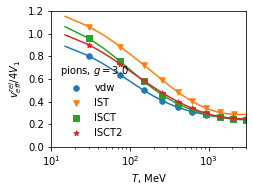

In [7]:
# plots for different eos
g_array = [3., 30.,300.,3000.]

markers = cycle(['o', 'v', 's', '*'])

particle_type = 'pions'
mu = 0.
R = 0.39

selected_g = [3.]

plt.figure(figsize=(3.5,2.5))

for g in g_array:

    # plotting only selected g values
    if selected_only:
        if g not in selected_g:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)

    plt.gca().set_prop_cycle(None)
    
    # b = 0.
    # for label in labels:
    #     plotting('--')
    
    plt.xlim(10, 3e3)
    plt.ylim(0, 1.2)

    make_axis_labels()

    plt.legend(frameon=False, title=f'{particle_type}, $g={g}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'vratio_of_T_{particle_type}_g_{g}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

# light mesons

d:\Users\nsyak\Desktop\Speed_of_Sound_and_V_eff\eos\relativistic_ISCT.py:144: RuntimeWarning: invalid value encountered in double_scalars
  v_eff = v_numerator / v_denumerator


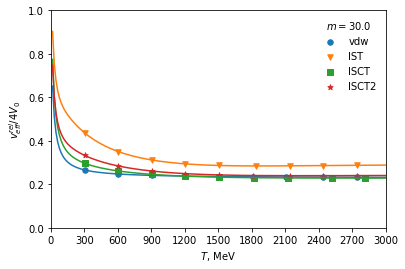

In [8]:
# plots for different masses and different eos
m_array = [20., 25., 30.]
mu = 0.
g = 3.
R = 0.4

markers = cycle(['o', 'v', 's', '*'])

selected_m = [30.]

plt.figure(figsize=(3.5,2.5))

for m in m_array:
    particle_type = f'ligth_mes_m_{m}'

    # plotting only selected mass values
    if selected_only:
        if m not in selected_m:
            continue

    b = 1.
    for label in labels:
        plotting('-', curve_label=label)
    
    plt.gca().set_prop_cycle(None)
    
    # b = 0.
    # for label in labels:
    #     plotting('--')
    
    
    # plt.hlines(1, -100, 3e3 )

    plt.xlim(0, 3e3)
    plt.ylim(0,1.)
    
    make_axis_labels()

    plt.legend(frameon=False, title=f'$m = {m}$')

    plot_folder = get_plot_folder('diff_eos')
    plot_file = f'vratio_of_T_{particle_type}_R_{R}_.pdf'
    savepath = get_savepath()
    if saving:
        plt.savefig(savepath, bbox_inches='tight')

    plt.show()

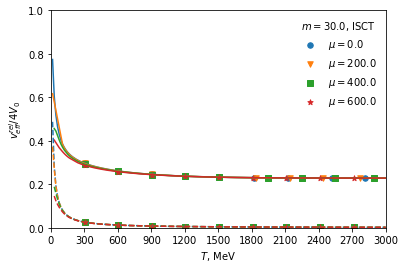

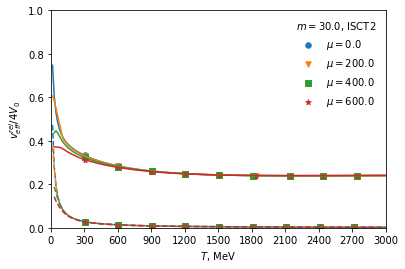

In [4]:
# plots for different chemical potentials mu and different eos
m_array = [20., 25., 30.]
mu = 0.
g = 3.
R = 0.4

mu_array = [0., 200., 400., 600.]

markers = cycle(['o', 'v', 's', '*'])

selected_eos = ['ISCT', 'ISCT2']
selected_m = [30.]

for m in m_array:

    plt.figure(figsize=(3.5,2.5))
    for label in labels:
        particle_type = f'ligth_mes_m_{m}'

        # plotting only selected mass values
        if selected_only:
            if m not in selected_m or label not in selected_eos:
                continue

        b = 1.
        for mu in mu_array:
            plotting('-', curve_label=f'$\\mu={mu}$')
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for mu in mu_array:
            plotting('--')
        
        
        # plt.hlines(1, -100, 3e3 )

        plt.xlim(0, 3e3)
        plt.ylim(0, 1.)
        
        make_axis_labels()

        plt.legend(frameon=False, title=f'$m = {m}$, {label}')

        plot_folder = get_plot_folder('diff_mu')
        plot_file = f'vratio_of_T_{particle_type}_{label}_R_{R}_.pdf'
        savepath = get_savepath()
        if saving:
            plt.savefig(savepath, bbox_inches='tight')

        plt.show()